In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns 

In [3]:
df_org = pd.read_csv('Superstore_Sales.csv', encoding='windows-1252')

In [4]:
#Copying our dataset into another dataframe named 'df'
df = df_org.copy()

### Univariate Analysis:

#### **1. Understand Dataset:** Explore the structure of the dataset, including the number of rows and columns.

In [5]:
#Top 5 entries of dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
#Bottom 5 entries of dataset
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [7]:
#Exploring the numner of rows and columns in dataset
df.shape

(9994, 21)

- There are around 9994 rows and 21 columns in given dataset.

In [8]:
#Enlisting the different column names present in dataset 
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### **2. Data Cleaning:** Handle missing values, if any, and check for any anomalies in the data.

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

- There are no null/missing values present in our dataset

In [10]:
print(df['Order Date'].unique())

print(df['Ship Date'].unique())

['11/8/2016' '6/12/2016' '10/11/2015' ... '6/3/2016' '4/12/2015'
 '1/21/2014']
['11/11/2016' '6/16/2016' '10/18/2015' ... '5/23/2015' '1/23/2014'
 '3/3/2017']


In [11]:
print(df['Order Date'].dtype)
print(df['Ship Date'].dtype)

object
object


- Convert date columns ("Order Date", "Ship Date") to datetime objects for easier manipulation.

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [52]:
df['Ship Mode'].value_counts()
# The 'Ship Mode' is categorical feature and values are already encoded into 4 Categories: Standard Class, Second Class, First Class, Same Day

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [14]:
df['Segment'].value_counts()
# The 'Segment' is categorical feature and values are already encoded into 3 Categories: Consumer, Corporate, Home Office

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [15]:
df['Category'].value_counts()
# The 'Category' is categorical feature and values are already encoded into 3 Categories: Office Supplies, Furniture, Technology

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [16]:
df[['Product ID','Product Name']].value_counts()

Product ID       Product Name                                               
TEC-AC-10003628  Logitech 910-002974 M325 Wireless Mouse for Web Scrolling      15
FUR-CH-10002647  Situations Contoured Folding Chairs, 4/Set                     15
FUR-CH-10002880  Global High-Back Leather Tilter, Burgundy                      14
OFF-BI-10001524  GBC Premium Transparent Covers with Diagonal Lined Pattern     14
FUR-CH-10003774  Global Wood Trimmed Manager's Task Chair, Khaki                14
                                                                                ..
TEC-MA-10000904  Brother MFC-9340CDW LED All-In-One Printer, Copier Scanner      1
TEC-MA-10001031  Socket Bluetooth Cordless Hand Scanner (CHS)                    1
TEC-MA-10001570  Cisco Desktop Collaboration Experience DX650 IP Video Phone     1
OFF-PA-10002001  Xerox 1984                                                      1
FUR-BO-10000112  Bush Birmingham Collection Bookcase, Dark Cherry                1
Name: coun

- Reviewing high cardinality in columns, especially in the context of columns like **"Product ID"** and **"Product Name"** in your dataset, is an important step in data analysis and preprocessing. High cardinality means that a column contains a large number of unique values.

#### **3. Data Types:** Check the data types of each column. Ensure they are appropriate for the analysis.

In [17]:
#Checking the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#### **4. Descriptive Statistics:** Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).

In [18]:
#Let's see some of the descriptive statistics  like percentile, mean, std, etc. of a data
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


#### **5. Histograms:** Create histograms to visualise  the distribution of key numeric variables.

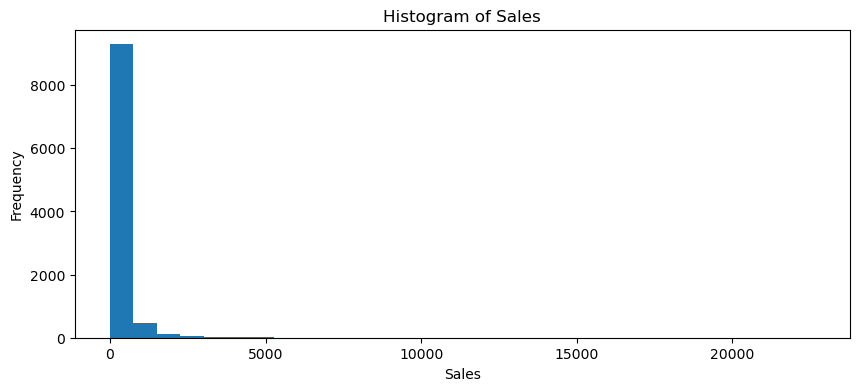

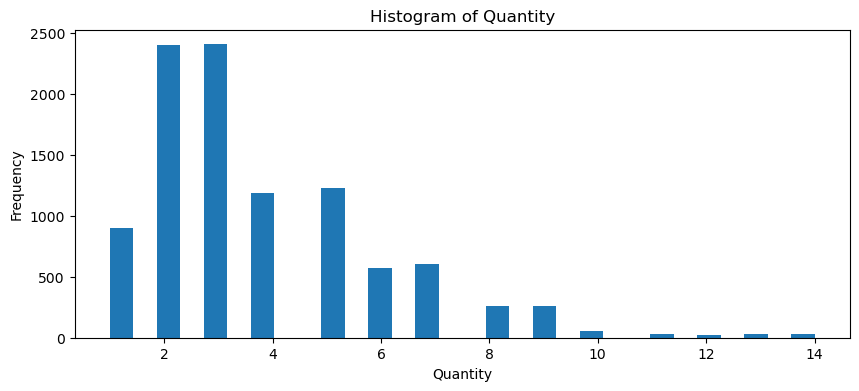

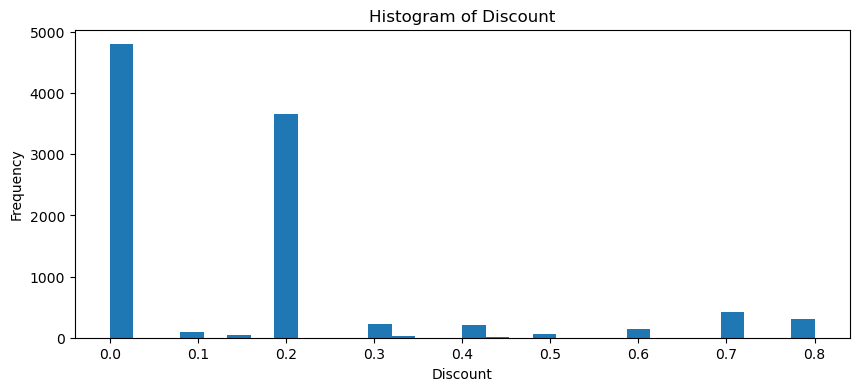

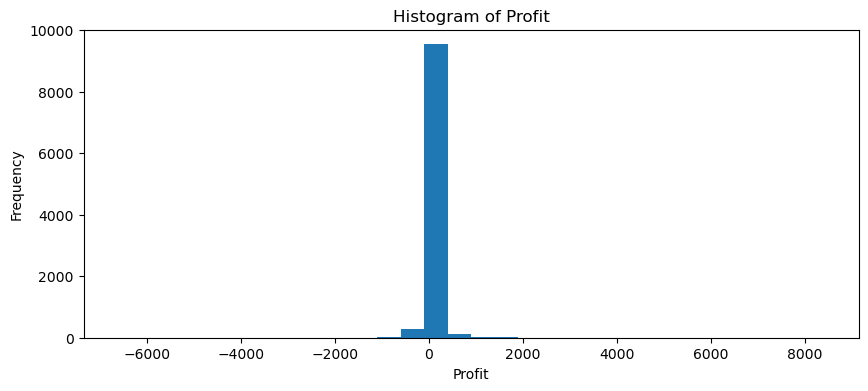

In [19]:
#Selecting the appropriate numerical column for the histogram plot
numerical_columns = df[['Sales','Quantity','Discount','Profit']].copy()

# Plotting histograms for the remaining numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


- **Sales:** The histogram of Sales shows that the **majority of sales are of low value**, with a sharp peak close to zero and a long tail to the right.
**High-value sales are much less common**, indicating that the company primarily deals in low-ticket items or that large sales are rare events.

- **Quantity:** The histogram of Quantity shows that **smaller quantities (around 2-4 items) are the most frequently sold**, with the frequency decreasing as the quantity increases.
This suggests that **bulk purchases are less common** than individual or small-quantity purchases.

- **Discount:** The histogram of Discount shows that **most transactions involve either no discount or a small discount**, with a peak at 0 and around 0.2.
Higher discounts (over 0.2) are less frequent, indicating that the **company does not often offer large discounts**.

- **Profit:** The histogram of Profit is **highly concentrated around the zero mark**, suggesting that many transactions are just breaking even.
There are some transactions with **significant losses and profits**, but these are relatively few.

#### **6. Time Series Plots:** Plot time series graphs to understand the trends and patterns in sales over the 4-year period.

In [20]:
#importing mdates library
import matplotlib.dates as mdates

- We imported mdates from the matplotlib.dates module. The mdates library was used for formatting the dates on the x-axis of the plot. 

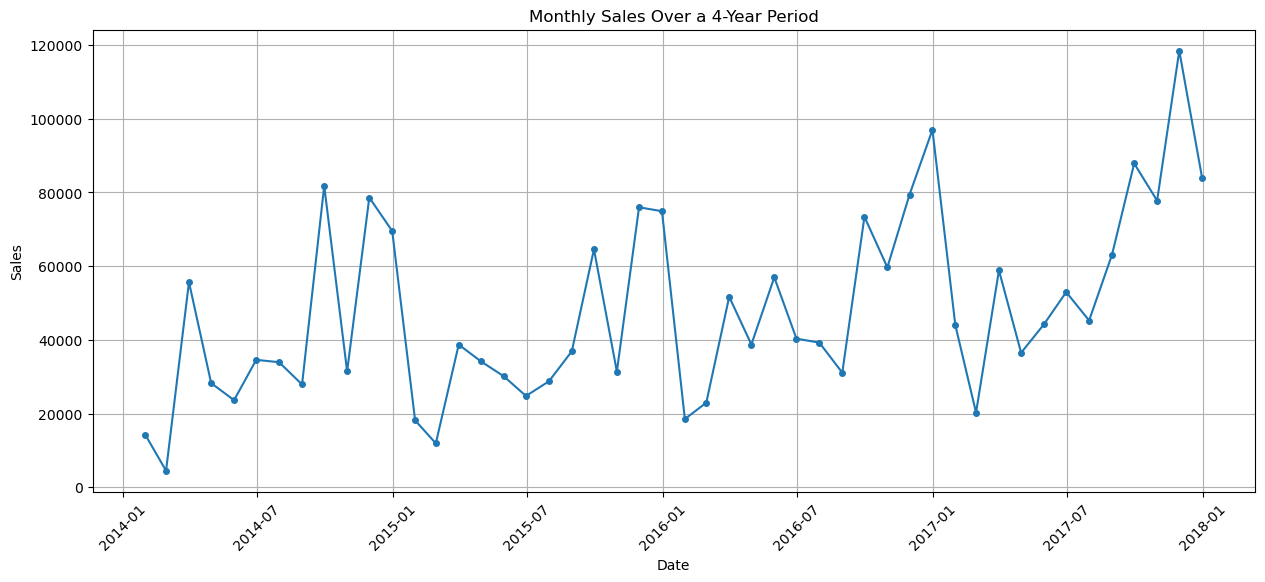

In [21]:
# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resampling the data on a monthly basis and summing up the sales
monthly_sales = df['Sales'].resample('M').sum()

# Plotting the time series graph for sales
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales, marker='o', markersize=4)
plt.title('Monthly Sales Over a 4-Year Period')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)

# Formatting the date axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)

plt.show()


- **Seasonal Trends:** The graph may show **peaks and troughs corresponding to specific times of the year**. For instance, if there are consistent peaks during certain months across different years, it could **indicate a seasonal increase in sales**, such as during holiday seasons or specific shopping periods (e.g., Black Friday, back-to-school season).

- **Sales Growth or Decline Over Time:** By observing the overall trend of the graph, you can assess whether the business is experiencing growth, stability, or decline. An **upward trend over the years indicates growth**, while a **downward trend suggests a decline in sales**. A **stable, horizontal trend would imply that sales are consistent over time**.

#### **7. Seasonal Decomposition:** Decompose time series data into components like trend, seasonality, and residuals for deeper insights.


In [22]:
#importing statsmodels library
from statsmodels.tsa.seasonal import seasonal_decompose

- To decompose a time series into its components such as trend, seasonality, and residuals, we can use the seasonal_decompose function from the statsmodels library. This function can decompose a time series into these components based on either an additive or multiplicative model.

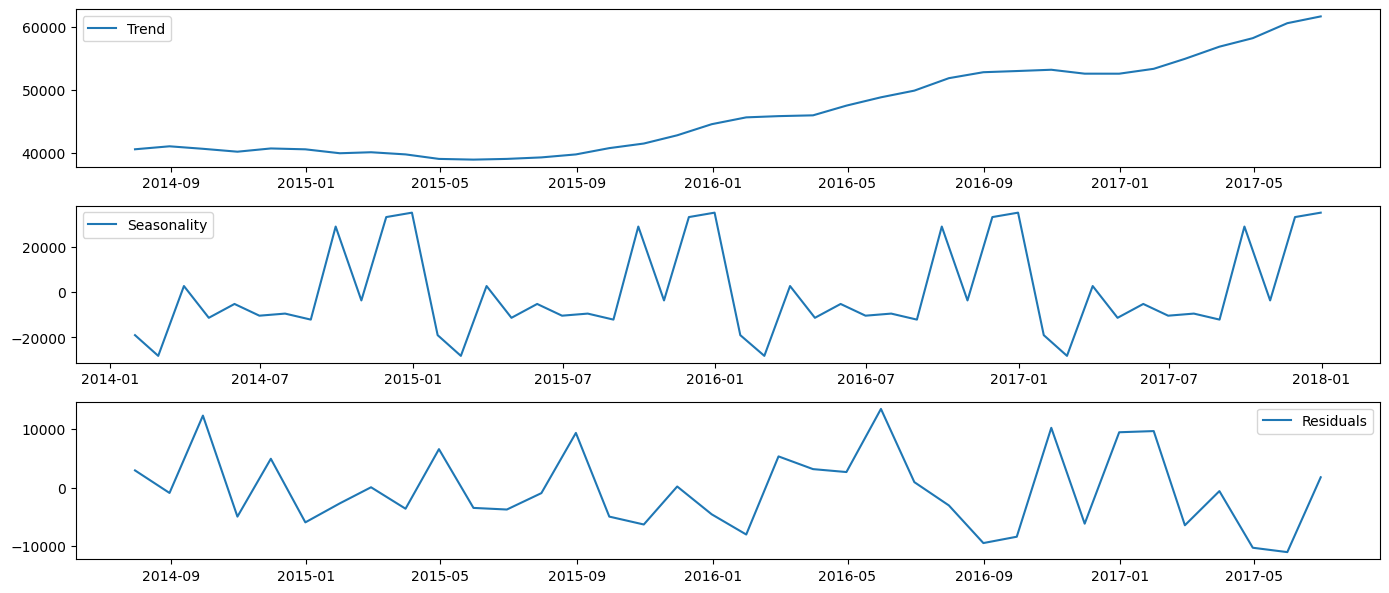

In [23]:
# Decomposing the time series
# Assuming the data has a yearly seasonality, hence using period=12 for monthly data
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Extracting the trend, seasonality, and residuals components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(14, 8))

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


- **Trend:** This plot shows the underlying trend in the data. It highlights any **long-term increase or decrease in sales**, smoothing out short-term fluctuations.

- **Seasonality:** This plot reveals the **seasonal pattern in the data**. Regular patterns that repeat over a known period (in this case, assumed to be yearly) are shown here. 

- **Residuals:** This plot shows the **irregular or random components** that cannot be attributed to the trend or seasonality. 

#### 8.. Box Plots: Use box plots to identify outliers and understand the distribution of numeric variables.

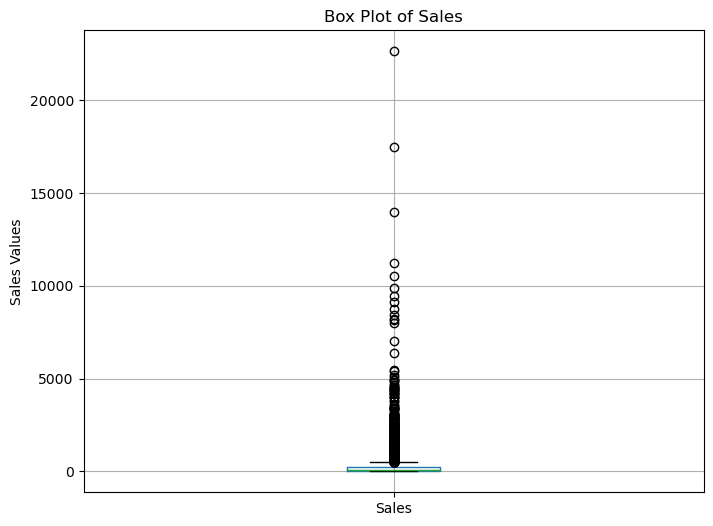

In [24]:
# Box plot for the 'Sales' column
plt.figure(figsize=(8, 6))
df.boxplot(column='Sales')
plt.title('Box Plot of Sales')
plt.ylabel('Sales Values')
plt.show()


- With **sales values much higher than the median**. This suggests that while most of the sales transactions are of **lower value**, there are occasional sales transactions that are much higher, possibly indicating large purchases or high-value items.

- The data distribution for sales is **right-skewed**, as indicated by the **presence of outliers on the higher side and the median closer to the lower quartile**.

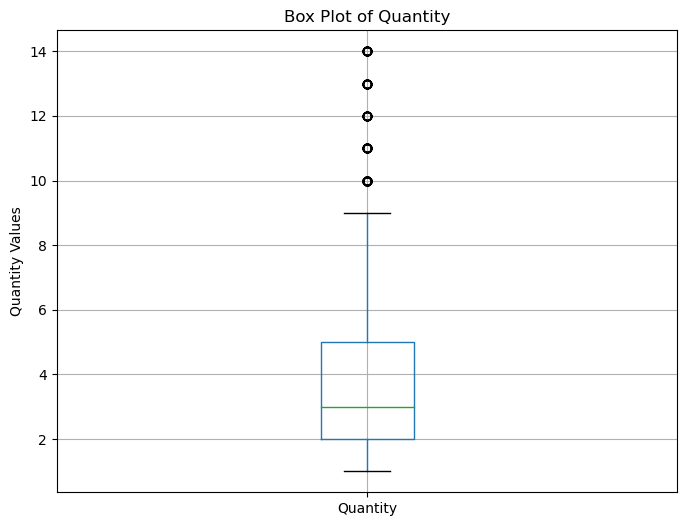

In [25]:
#Box Plot for 'Quantity' column
plt.figure(figsize=(8, 6))
df.boxplot(column='Quantity')
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity Values')
plt.show()

- The center 50% of the data, which appears to be between roughly 2 and 7, is represented by the central box. The interquartile range (IQR) is shown here.

- Above the upper whisker, there are multiple noticeable outliers, indicating that some quantity values are remarkably high in comparison to the rest.

-  There's a consistent range of quantities being ordered, with occasional larger orders.

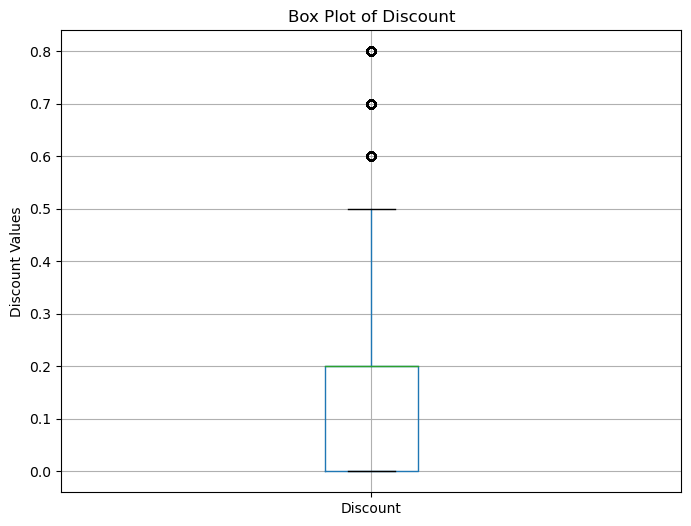

In [26]:
#Box Plot for 'Discount' column
plt.figure(figsize=(8, 6))
df.boxplot(column='Discount')
plt.title('Box Plot of Discount')
plt.ylabel('Discount Values')
plt.show()

- The IQR of the Discount box plot is smaller, ranging from roughly 0.1 to 0.2.

- A modest overall discount rate is shown by the median discount, which is just above 0.1.

- Like the Quantity plot, this one also has a lengthy upper whisker that reaches about 0.7, suggesting some significant but comparatively small discounts.

- Above the upper whisker, there are outliers that show some extremely large discounts that do not match the overall trend.

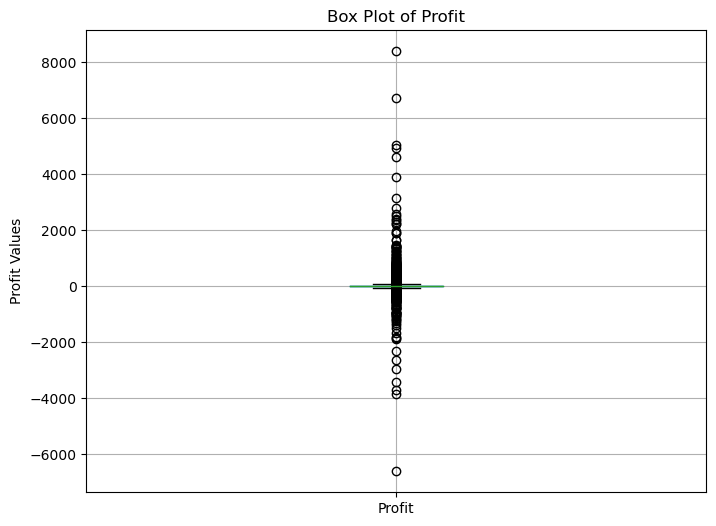

In [27]:
#Box Plot for 'Profit' column
plt.figure(figsize=(8, 6))
df.boxplot(column='Profit')
plt.title('Box Plot of Profit')
plt.ylabel('Profit Values')
plt.show()

- There are outliers on both ends, indicating both significant losses (below -2000) and significant profits (above 2000).

- The presence of outliers on both the high and low ends suggests a high variance in profit, with some transactions being highly profitable and others leading to substantial losses.

#### **9. Sales Distribution by Category:** Visualise the distribution of sales across different categories using bar charts or pie charts.

In [28]:
# Aggregating sales by category
category_sales = df.groupby('Category')['Sales'].sum()

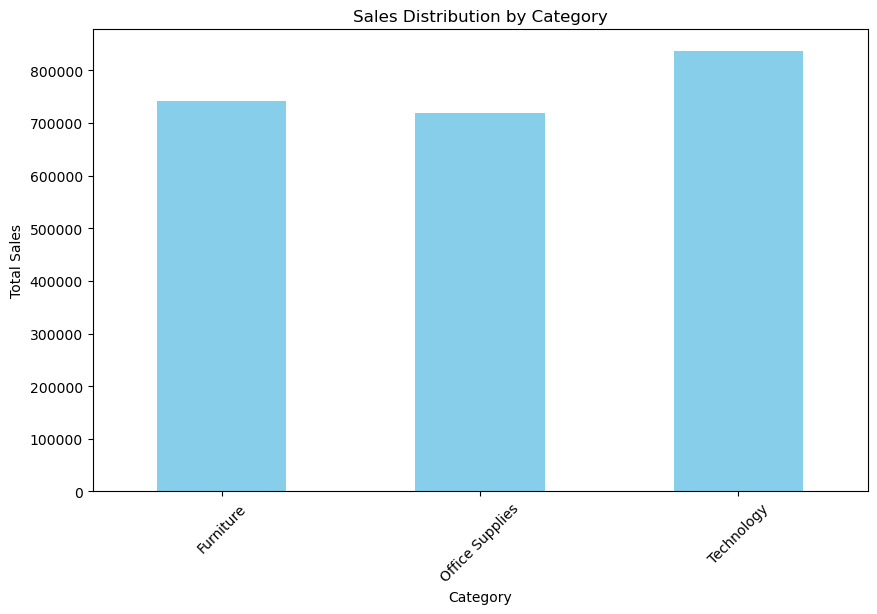

In [29]:
# Bar Chart for Sales Distribution by Category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

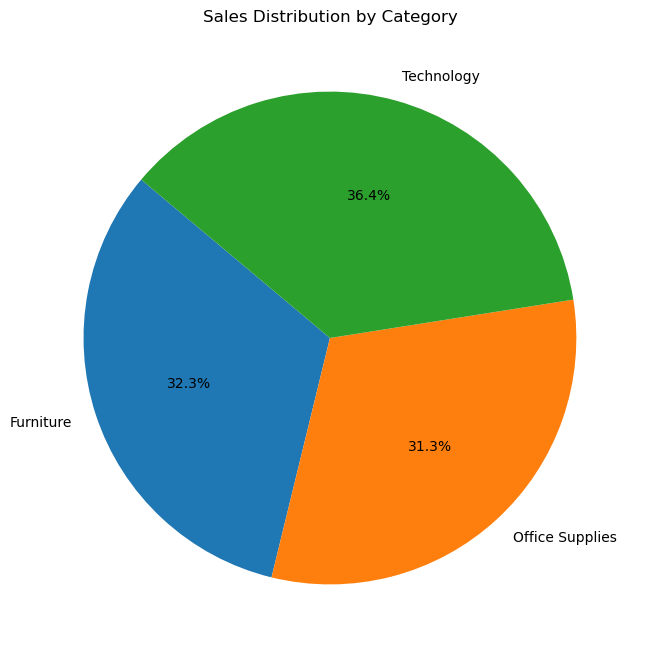

In [30]:
# Pie Chart for Sales Distribution by Category
plt.figure(figsize=(8, 8))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.ylabel('')  # Hiding the y-label for clarity
plt.show()

- The visualizations indicate that sales are **not evenly distributed** across categories. One or two categories significantly outperform the others, dominating the overall sales figures. 

- This suggests a potential focus area for business strategy, indicating which categories might benefit from increased attention.

#### **10. Sales Variation Over Time:** Plot line charts to observe how sales vary over different time periods (months, quarters, years).

In [31]:
# Resampling the data for different time periods
monthly_sales = df['Sales'].resample('M').sum()
quarterly_sales = df['Sales'].resample('Q').sum()
yearly_sales = df['Sales'].resample('A').sum()

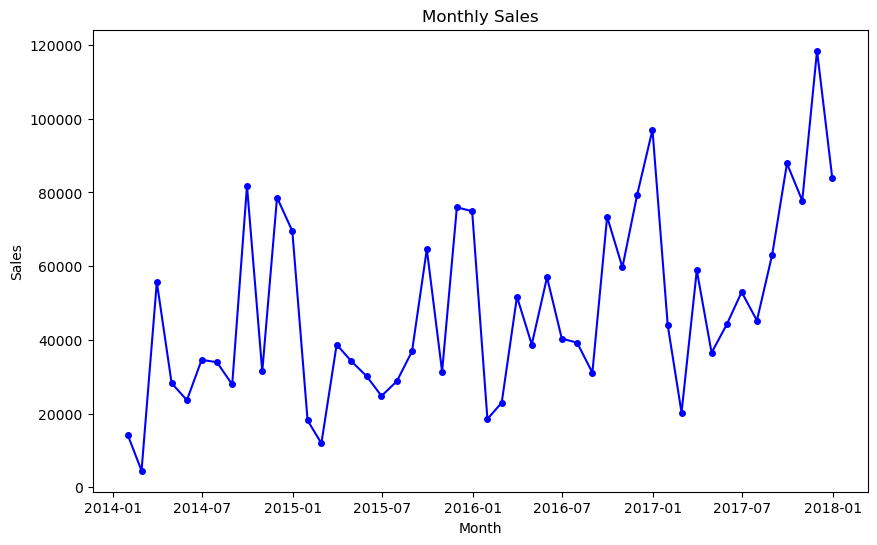

In [32]:
# Monthly Sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, color='blue', marker='o', markersize=4)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()

- The monthly sales chart reveals detailed fluctuations, highlighting **significant seasonal trends** and specific monthly anomalies. This granularity is useful for understanding **short-term sales** cycles and **planning monthly strategies**.

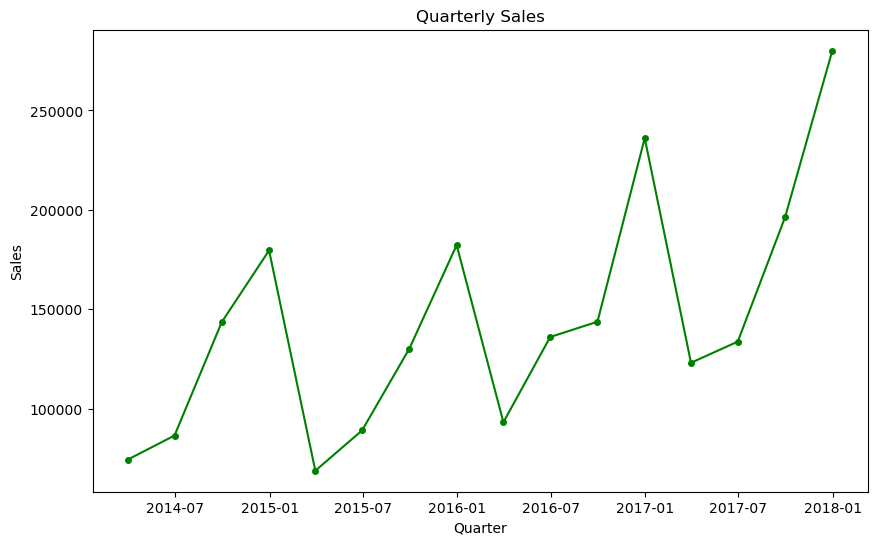

In [33]:
# Quarterly Sales
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales, color='green', marker='o', markersize=4)
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')

plt.show()

- The quarterly chart smooths out the **monthly variations**, showing broader sales trends and patterns. It's valuable for assessing the impact of **quarterly strategies** and understanding **seasonality effects** across different quarters.

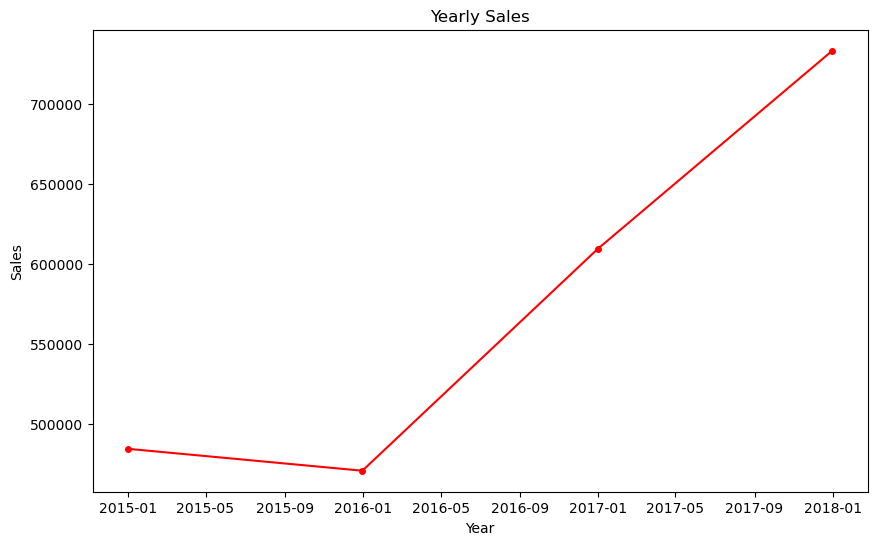

In [34]:
# Yearly Sales
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales, color='red', marker='o', markersize=4)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

- The yearly chart provides a **high-level view of sales** performance over the years, indicating **long-term trends** and overall business growth or decline. This perspective is essential for **strategic planning** and **long-term decision-making**.

### Bivariate Analysis

#### **1. Correlation Analysis:** Examine the correlation between sales and other relevant numeric variables.

In [35]:
corr = numerical_columns.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


- **Sales:** As can be assumed from commercial operations, **sales and profit have the strongest correlation**. The imperfect nature of the relationship suggests that **factors other than sales may also have an impact on profit**.

- **Quantity:** There is **relatively little correlation between quantity and profit**, which could indicate that **selling more units has little effect on profit margins**.

- **Discount:** Given the **weak link between discounts and profit**, it is possible that **discounts are reducing the profit margin**. However, it should be noted that **discounts are not the only factor influencing profit**. The weak relationship between discounts and sales indicates that there isn't a linear relationship between discounts and sales volumes.

- **Profit:** Although the **correlation between sales and profit is the strongest**, it is still only moderate, suggesting that **factors other than sales volume have a significant role in determining profit**. It may be necessary to review discounting tactics to make sure they are not negatively affecting profitability, as indicated by the weak negative association with discount.

#### **2. Scatter Plots:** Plot scatter plots to explore the relationship between sales and another numeric variable.


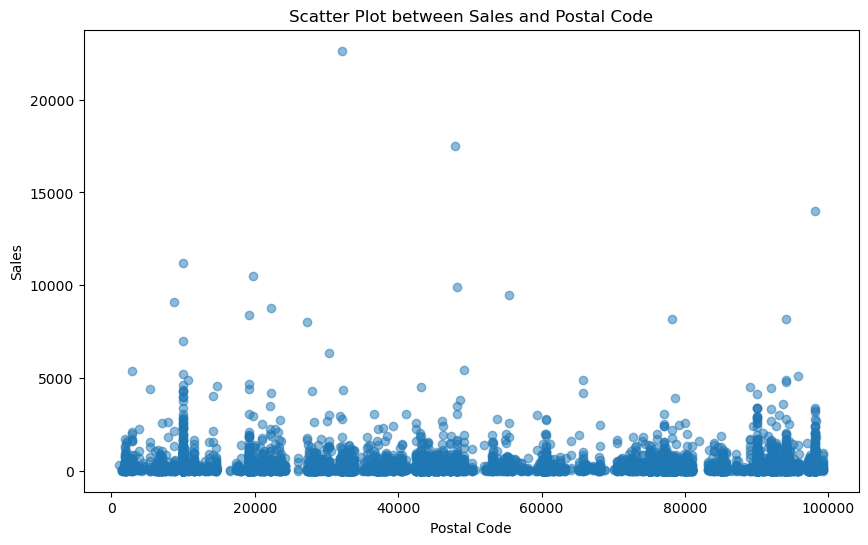

In [36]:
# Creating the scatter plot on Sales wrt Postal Codes
plt.figure(figsize=(10, 6))
plt.scatter(df['Postal Code'], df['Sales'], alpha=0.5)
plt.title('Scatter Plot between Sales and Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Sales')
plt.show()

- It appears that sales amounts are generally **low across most postal codes** because the majority of sales data points are **concentrated near the lower end** of the sales axis.

- Sales are **distributed widely** among different postal codes, suggesting that they take place in a variety of locales.

- A small number of data points stand out as **outliers** because of their unusually high sales figures.

- The **absence of any apparent trend** indicates that variables other than the postal code probably have a bigger influence on sales numbers.

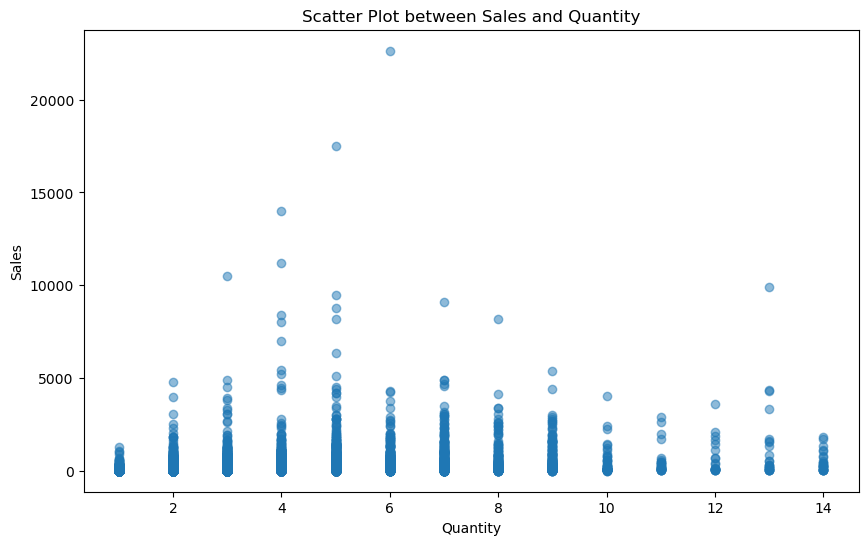

In [37]:
# Creating the scatter plot on Sales wrt Quantity
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Sales'], alpha=0.5)
plt.title('Scatter Plot between Sales and Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

- There's a wide distribution of sales across different quantities.

- Most of the sales data points are clustered at the lower end of the sales axis, with a few data points showing very high sales.

- The lack of a clear trend in the scatter plot suggests that quantity alone may not be a strong predictor of sales. Other factors could be influencing sales, such as the type of products sold, their individual prices, and the purchasing patterns of customers.

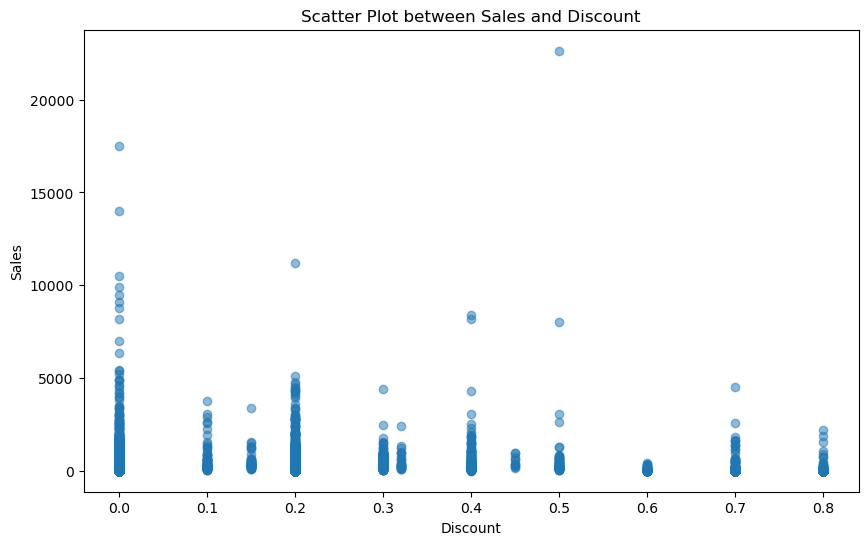

In [38]:
# Creating the scatter plot Sales wrt Discount
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Sales'], alpha=0.5)
plt.title('Scatter Plot between Sales and Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

- The lack of a clear pattern may suggest that discounts do not have a straightforward impact on sales volume. This could imply that other factors are at play that influence sales more than discounts alone.

- The presence of high sales at lower discount rates could indicate that customers are willing to purchase without substantial discounts, possibly due to the attractiveness of the product or brand loyalty.

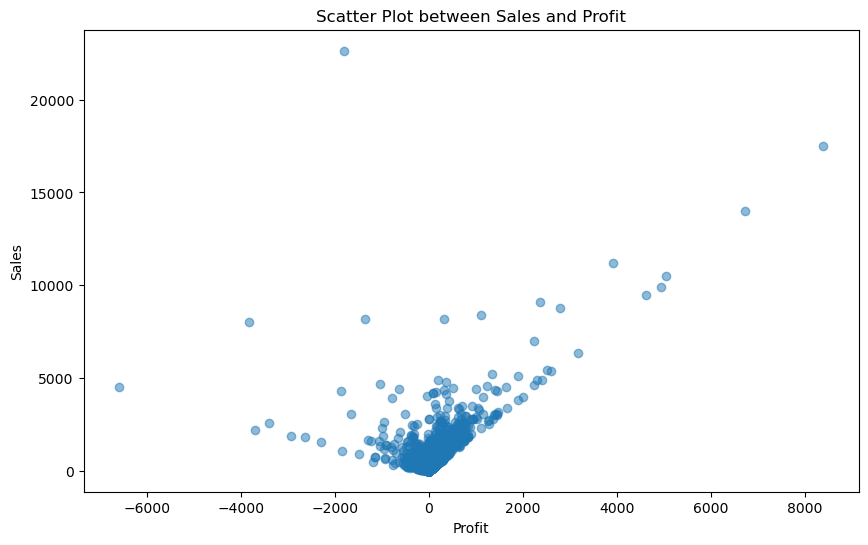

In [39]:
# Creating the scatter plot on Sales wrt Profit
plt.figure(figsize=(10, 6))
plt.scatter(df['Profit'], df['Sales'], alpha=0.5)
plt.title('Scatter Plot between Sales and Profit')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

- It appears that a high volume of transactions leads to low sales and poor profits because there is a cluster of data points around the lower end of both sales and profit.

- A tendency that seems to be in the positive direction is especially apparent when profit rises. Increased sales are correlated with increased profitability, as one may anticipate in most commercial situations.

- There are outliers with large earnings and sales, which could be high-end products or exceptionally profitable sales transactions.

- Additionally, there are instances where profit is negative despite relatively high sales, indicating that some sales transactions result in a loss. These could result from high expenses, sales quantities that aren't profitable, or other issues.


#### **3. Pair Plots:** Use pair plots for a quick overview of relationships between multiple numeric variables.

c:\Users\bhavs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


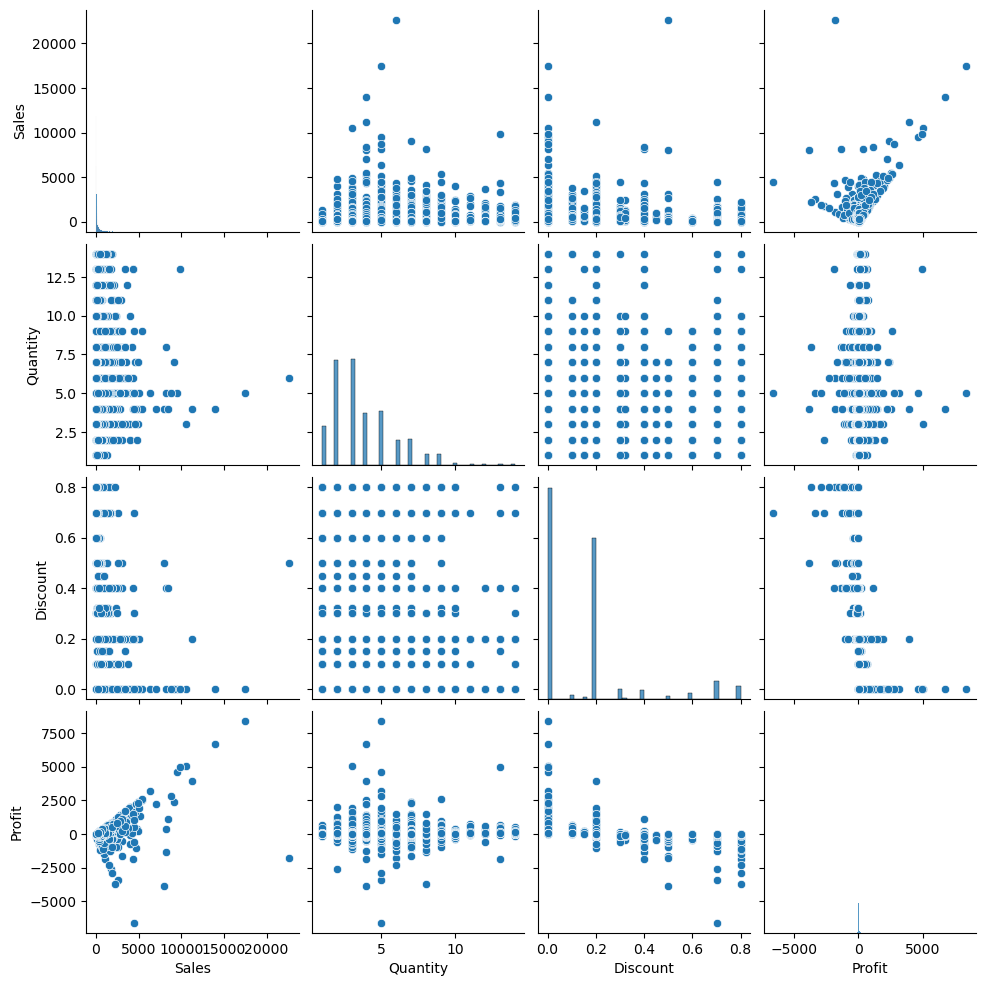

In [40]:
sns.pairplot(numerical_columns)

**Sales:**

- There may be a positive correlation between "Quantity" and "Sales," indicating that when the number of products sold rises, so do sales.

- The 'Sales' against 'Discount' plot may have a dispersed distribution lacking of any discernible pattern, suggesting that the quantity of the discount offered and the volume of sales do not have a direct correlation.

- Given that larger sales usually translate into higher profits, a scatter plot of "Sales" versus "Profit" would probably display a positive association.

**Quantity**

- The common quantities of things sold would be displayed in the 'Quantity' distribution.

- When 'Quantity' and 'Discount' are plotted against each other, a scatter plot may not clearly display a pattern, suggesting that there is not a linear relationship or that other factors may be at play.

- A weak but positive correlation may exist between "Quantity" and "Profit," indicating that increasing sales does not always translate into a rise in profit.


**Discount**

- How often and how much discounts are used would be shown by the distribution of 'Discount'.

- The 'Discount' vs. 'Profit' scatter plot may show a negative association, indicating that larger discounts may result in smaller profit margins.

**Profit**

- The range of profit/loss figures as well as whether the company typically turns a profit or a loss are displayed by the "Profit" distribution.

- As previously stated, there should be a positive correlation seen in the scatter plot of "Profit" versus "Sales."

#### **4. Category-wise Sales Trends:** Analyze how sales trends differ across different categories using line charts.

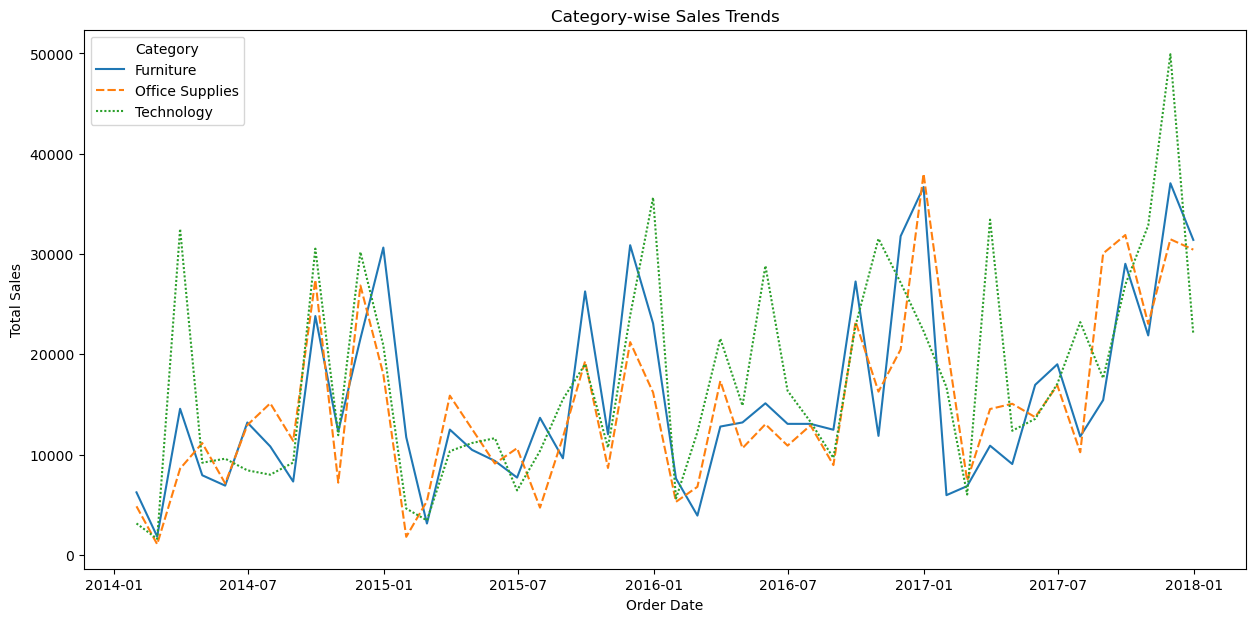

In [41]:
# Group the data by 'Category' and 'Order Date' and sum the sales
category_sales = df.groupby(['Category', pd.Grouper(freq='M')]).agg({'Sales': 'sum'}).reset_index()

# Pivot the data to have categories as columns and dates as rows
category_sales_pivot = category_sales.pivot(index='Order Date', columns='Category', values='Sales')

# Plotting the sales trends for each category
plt.figure(figsize=(15, 7))
sns.lineplot(data=category_sales_pivot)
plt.title('Category-wise Sales Trends')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.show()

- Every category has a comparable pattern of variation, indicating that there are common seasonal trends impacting sales in every category of products.

- Sales of technology typically **peak higher than those of the other two** categories, suggesting that when sales of technology grow, they do so more significantly.

- Sales for every category show a **discernible seasonal pattern that rises around the same time every year**. This may be a sign of a seasonal event or holiday season that propels sales for all product categories.

- Compared to Furniture & Technology, Office Supplies has the **least fluctuating sales peaks and troughs**, indicating **more stable sales** in this sector.

#### **5. Heatmaps:** Create heatmaps to visualize the correlation matrix for better insights.

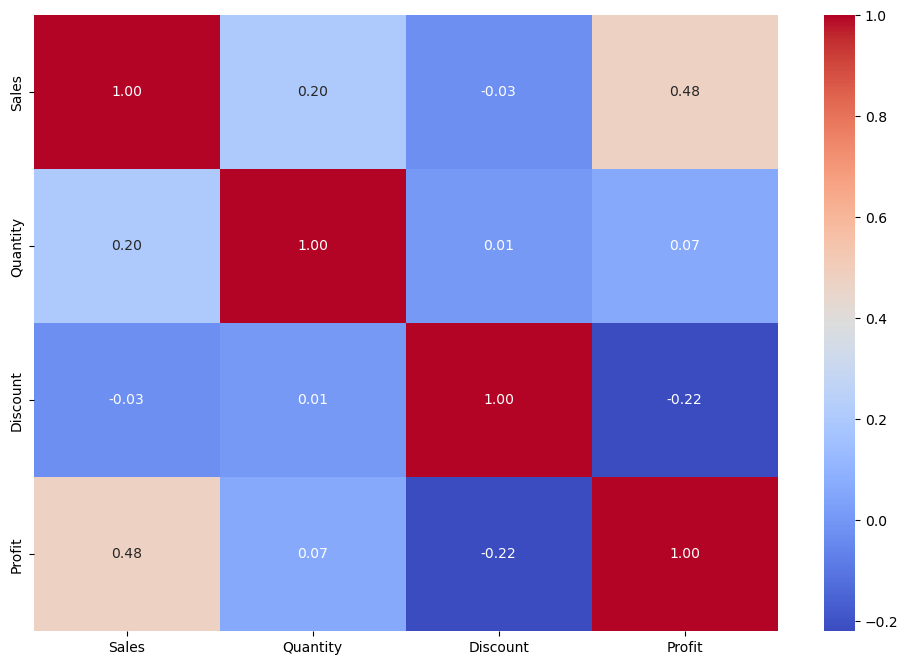

In [42]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Previously we have already calculated the correlation values for the numeric variables and stored in 'corr' variable

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

- Although the association is only moderate, other factors may also be at work, increasing sales may be a lever to boost profits.

- Profit is not significantly influenced by the quantity sold, meaning that selling more does not always translate into greater profit.

- Given that discount strategies may have a detrimental effect on profit margins, they should be evaluated.

- Discounts don't really increase sales or quantity sold, hence their function might be more competitive or strategic than straight sales-boosting.

#### **6. Sales by Region:** Compare sales across different regions using bar charts or stacked bar charts.

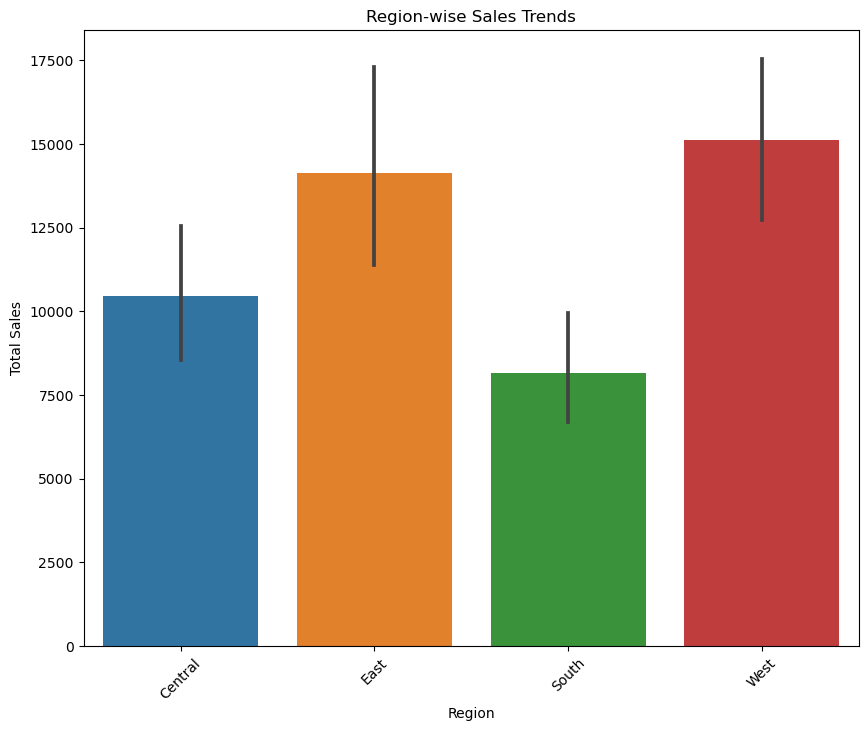

In [43]:
# Group the data by 'Category' and 'Order Date' and sum the sales
regional_sales = df.groupby(['Region', pd.Grouper(freq='M')]).agg({'Sales': 'sum'}).reset_index()

# Pivot the data to have categories as columns and dates as rows
regional_sales_pivot = regional_sales.pivot(index='Order Date', columns='Region', values='Sales')

# Plotting the sales trends for each category
plt.figure(figsize=(10, 8))
sns.barplot(data=regional_sales_pivot)
plt.title('Region-wise Sales Trends')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

- Compared to the 'Central' and 'South' regions, the 'East' and 'West' regions have **greater overall sales**, with the 'West' having the greatest.

- The **error bars** illustrate that sales **vary significantly across all regions**, with the **'East' region** exhibiting the **most variability**.

- The 'South' region appears to have **more consistent sales** data when compared to other regions, as indicated by the smaller error bar.


#### **7. Customer Segment Analysis:** Explore sales trends for different customer segments using line charts or bar charts.


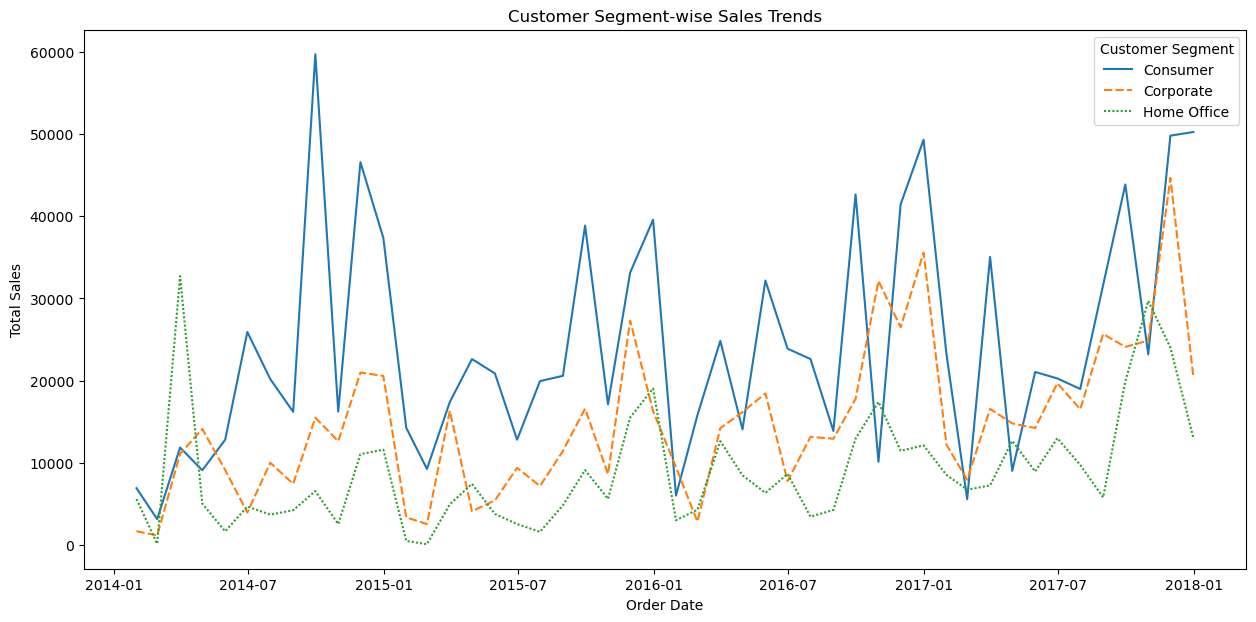

In [44]:
# Group the data by 'Category' and 'Order Date' and sum the sales
customer_segment_sales = df.groupby(['Segment', pd.Grouper(freq='M')]).agg({'Sales': 'sum'}).reset_index()

# Pivot the data to have categories as columns and dates as rows
customer_segment_sales_pivot = customer_segment_sales.pivot(index='Order Date', columns='Segment', values='Sales')

# Plotting the sales trends for each category
plt.figure(figsize=(15, 7))
sns.lineplot(data=customer_segment_sales_pivot)
plt.title('Customer Segment-wise Sales Trends')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend(title='Customer Segment')
plt.show()

- **Consumer sales** typically lead and exhibit the **biggest peaks**, indicating that they represent the **company's largest consumer category** in terms of sales.

- **Similar seasonality is seen in all categories**, with peaks and troughs happening at about the same times. This could point to **seasonal trends in sales or events** that have an impact on all clientele.

- The **Home Office sector** typically has the **lowest sales**, indicating that the segments have **varied levels of need or purchasing power**. On the other hand, **the Corporate segment regularly behind the Consumers segment in sales**.

#### **8. Sales vs. Quantity:** Investigate the relationship between sales and quantity sold using scatter plots.

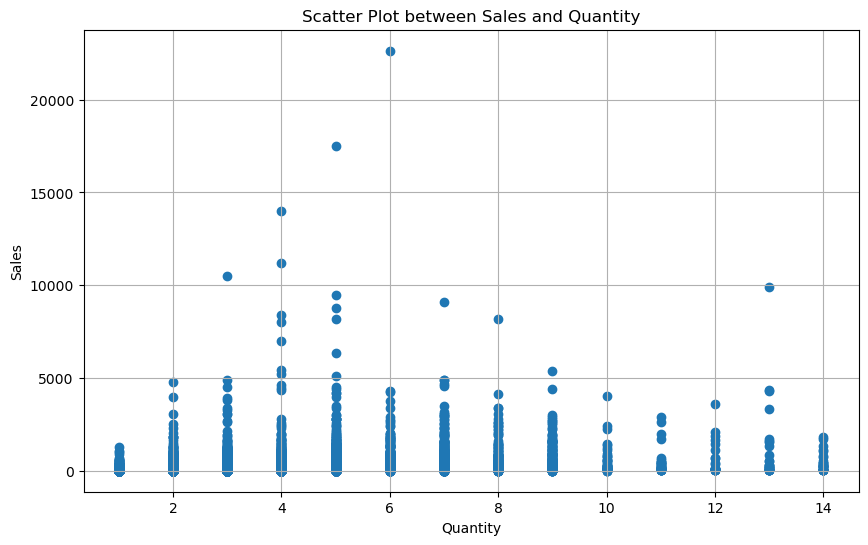

In [45]:
# Creating a scatter plot to investigate the relationship between sales and quantity sold
plt.figure(figsize=(10,6))
plt.scatter(df['Quantity'], df['Sales'])
plt.title('Scatter Plot between Sales and Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


- Sales have a tendency to rise in parallel with quantity, although the relationship is not perfectly linear.

- There are times when **comparatively little stock results in large sales**, which may be the result of expensive products.

- In retail statistics, when most transactions include the purchase of only a few items, the majority of sales are concentrated at lower volumes.

- Outliers with exceptionally high sales values in a range of quantities are present, indicating occasional significant transactions.

#### **9. Customer Segment vs. Quantity:** Compare the quantity sold across different customer segments using bar charts.

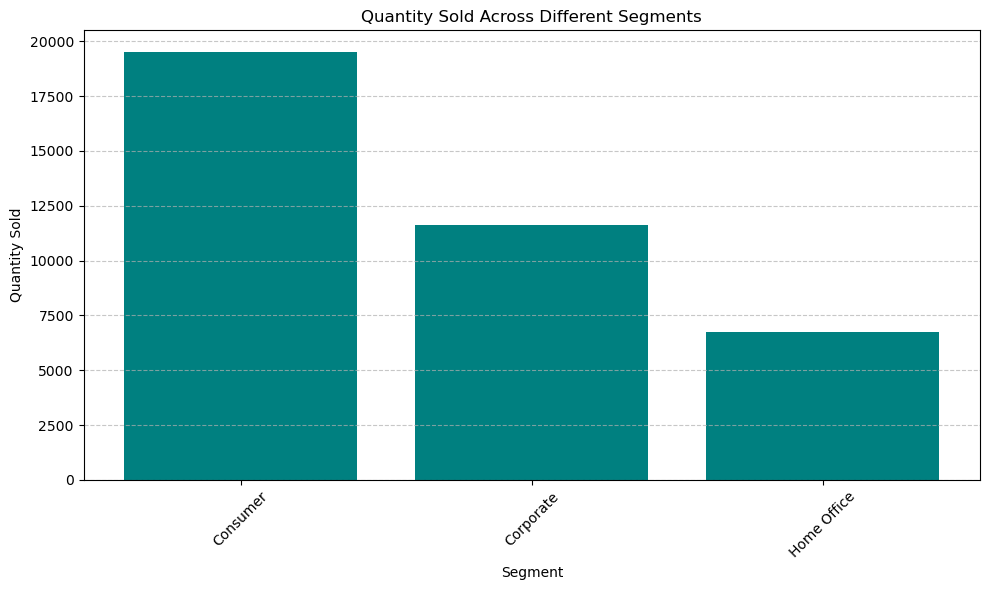

In [46]:
# Group the data by 'Segment' and sum the quantities
quantity_by_segment = df.groupby('Segment')['Quantity'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(quantity_by_segment['Segment'], quantity_by_segment['Quantity'], color='teal')
plt.title('Quantity Sold Across Different Segments')
plt.xlabel('Segment')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)  # Rotate the x-axis labels to show clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

- The 'Consumer' segment appears to have the highest quantity sold.

- The 'Corporate' segment follows next, with a lower quantity sold compared to the 'Consumer' segment.

- The 'Home Office' segment has the least quantity sold among the three segments.

#### **10. Discount Impact on Sales:** Analyze the impact of discounts on sales using bar charts or line charts.


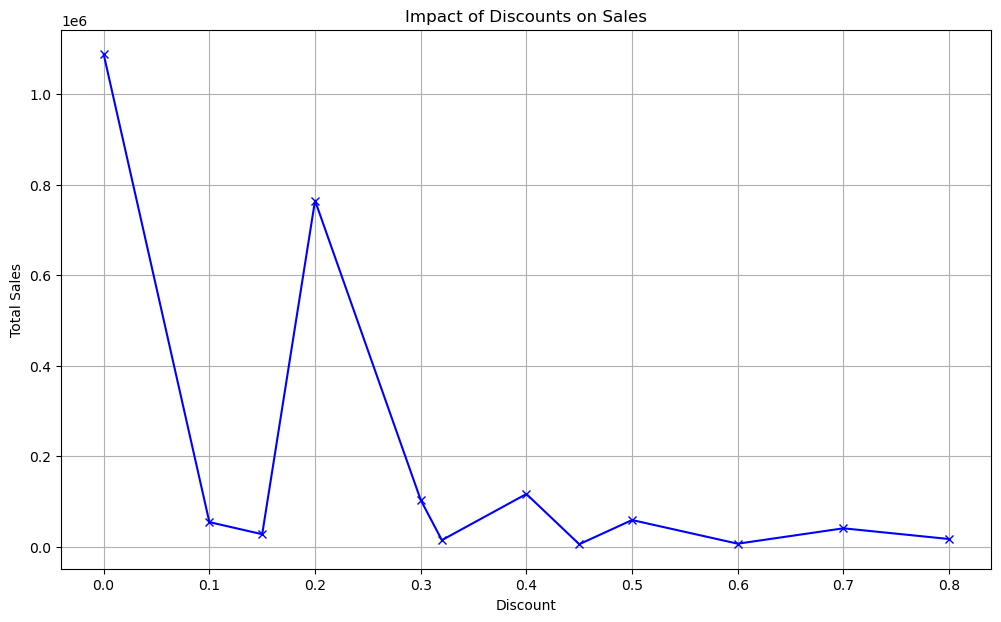

In [47]:
# To analyze the impact of discounts on sales using line charts, we'll need to aggregate the data.
# We will group the data by 'Discount' and sum the 'Sales' for each discount level.
sales_by_discount = df.groupby('Discount')['Sales'].sum().reset_index().sort_values(by='Discount')

# Plotting the line chart
plt.figure(figsize=(12, 7))
plt.plot(sales_by_discount['Discount'], sales_by_discount['Sales'], marker='x', linestyle='-', color='blue')
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

- Sales peak at lower discount levels, indicating that little discounts could encourage purchases.

- Beyond a certain point, increased discounts don't seem to significantly enhance total sales; instead, sales seem to fall with medium-level discounts and then level out with greater discounts.

- Discounts and sales don't seem to have a linear relationship. It implies that there might be a best discount level which might be lower than the highest discount provided that maximizes sales.

#### **11. Shipping Mode vs. Sales:** Explore the relationship between shipping modes and sales using categorical plots.

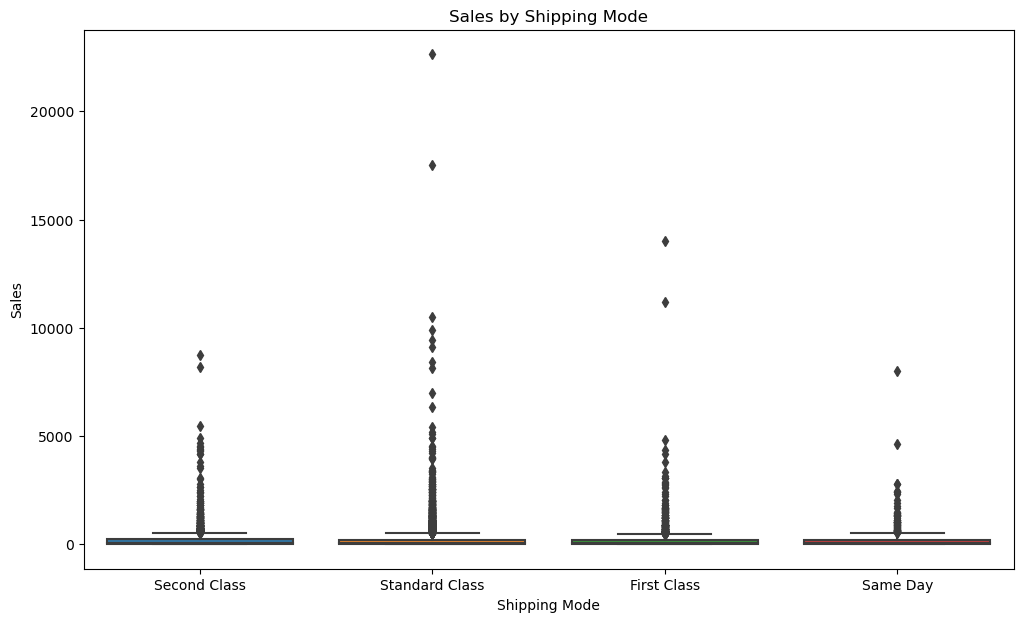

In [48]:
# compare the sales across different shipping modes.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Ship Mode', y='Sales', data=df)
plt.title('Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()


- The median sales value for all shipping ways is comparable, and given the variety of sales, it is fairly low, indicating that the average transaction is not very high.

- Every shipping option category has outliers, which means that certain sales are significantly greater than average. These could be higher-priced items or bulk orders.

- The biggest number of high-value outliers are within the widest range of sales experienced by the "Standard Class" shipping mode.

- The number of high-value sales via "First Class," "Second Class," and "Same Day" shipping options has gradually decreased.


#### **12. Product-wise Sales Analysis:** Investigate how sales vary for different products or categories using bar charts or line charts.

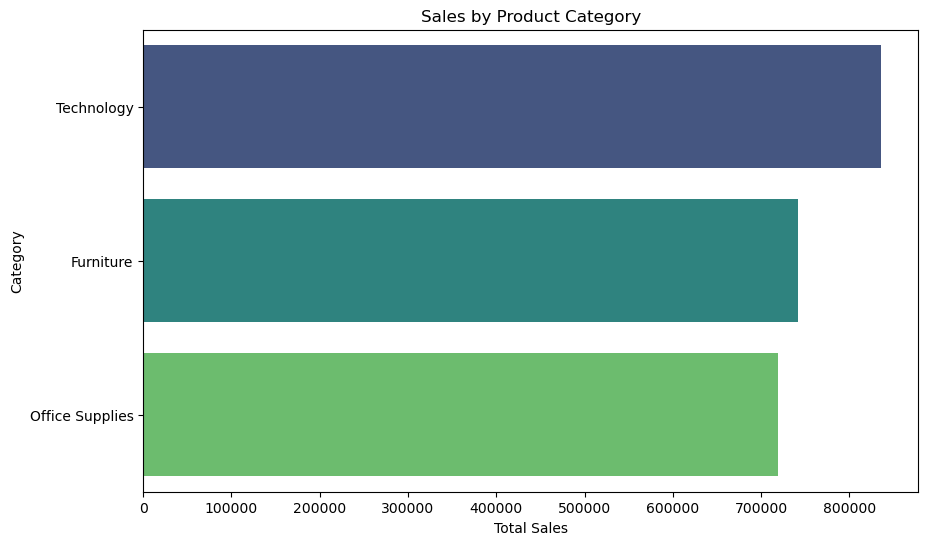

In [49]:
# For product-wise sales analysis, let's aggregate sales by 'Category'
# First, we'll look at the overall category sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# Plotting the overall category sales using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Category', data=category_sales, palette='viridis')
plt.title('Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

- This bar chart displays the total sales by product category. It shows which categories contribute the most to overall sales. Categories are sorted by total sales, with the highest-sales category at the top.

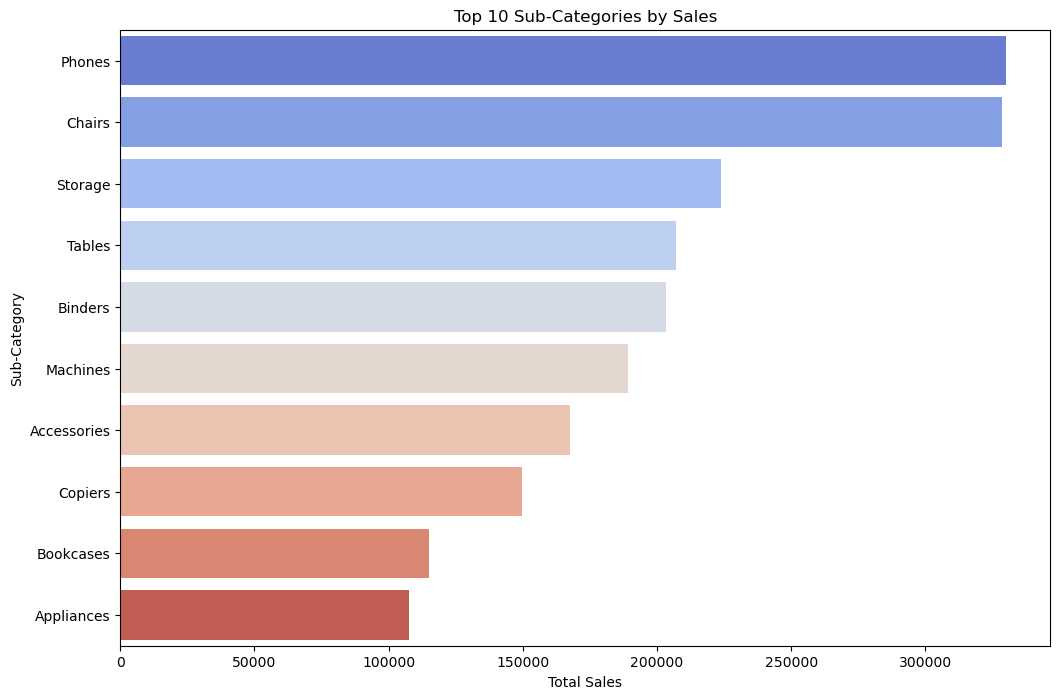

In [50]:
# For product-wise sales analysis, let's aggregate sales by 'Sub-Category' within each 'Category'

# Now, let's look at the sub-category sales within each category
sub_category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Since there are many sub-categories, let's plot the top 10 sub-categories for clarity in a bar chart
top_sub_categories = sub_category_sales.sort_values('Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Sub-Category', data=top_sub_categories, palette='coolwarm')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

- This bar chart showcases the top 10 sub-categories by total sales. This allows us to see more granular detail within categories, identifying which specific types of products are driving the most sales.

#### **13. Region-wise Product Sales:** Compare product sales across different regions using grouped bar charts.

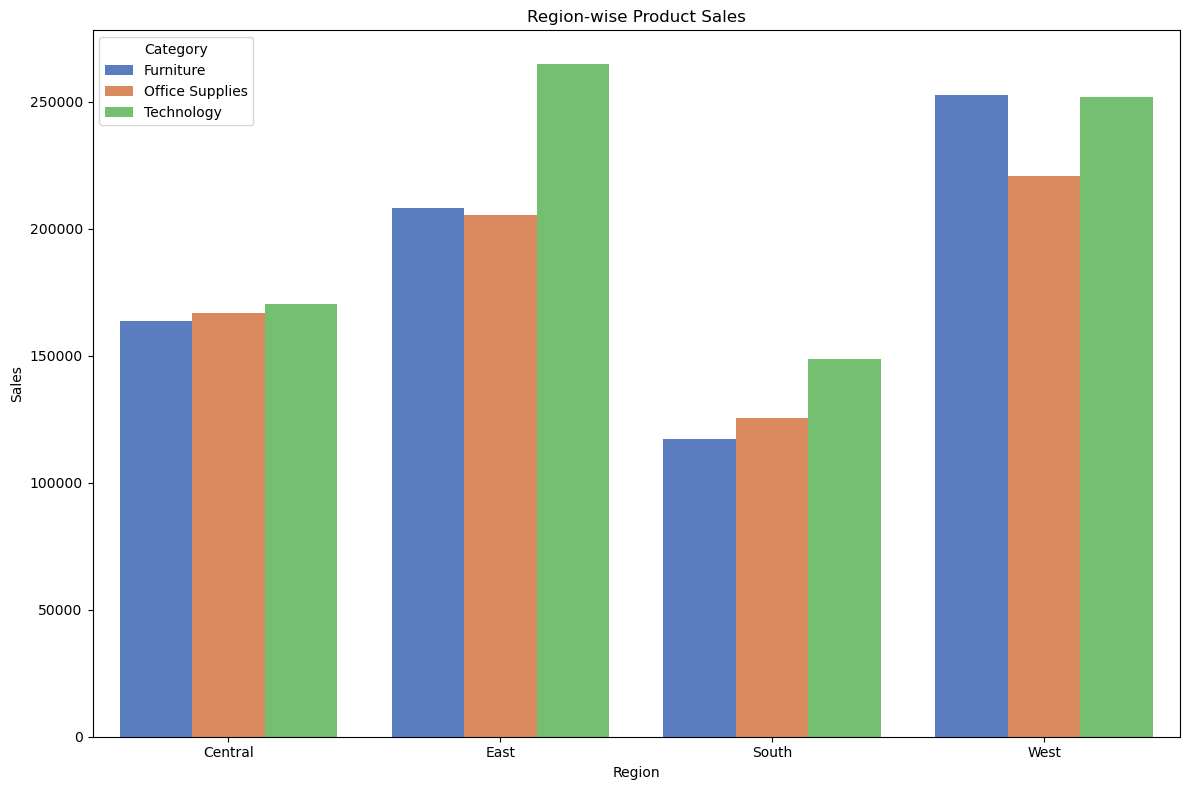

In [51]:
# Group the data by 'Region' and 'Category' and calculate the total 'Sales'
region_category_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Create a grouped bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', hue='Category', data=region_category_sales, palette='muted')
plt.title('Region-wise Product Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()

- East Region: Sales of office supplies are the lowest in this region, while those of technology are the greatest, followed closely by furniture. The East appears to be a robust market for technology.

- Central Region: Sales are pretty evenly distributed among the three categories, with Office Supplies coming in second and Technology in third place, but not by much. Furniture is the least popular category.

- South Region: In comparison to the East and Central areas, the South region has lower sales across all categories. Furniture and office supplies are almost equal, with technology ranking slightly higher.

- West Region: Technology leads the way in this region, which has the highest overall sales. Furniture and Office Supplies come next, with Office Supplies being slightly less than Furniture.

- All things considered, technology appears to be a best seller in every location, with the West having the strongest market across the board. With the lowest sales figures across all categories, the South area has space to expand.

#### **14. Document Findings:** Summarize key findings from both univariate and bivariate analyses. Highlight any notable trends or insights.


**Univariate Analysis:**

- Sales: The majority of sales have a low value, with a long tail and a high frequency close to zero, suggesting that high-value transactions are uncommon.

- Quantity: Sales in small amounts (2-4 items) are the most common, indicating that large purchases are unusual.

- Discount: With a high at 0 and approximately 0.2, most transactions have no or very little discount applied. Greater savings are not as common.

- Profit: With a concentration close to zero, a lot of transactions are barely breaking even. Minimal examples of notable profit or loss occur.



**Bivariate Analysis:**

- Sales and Profit: A moderate correlation, indicating that higher sales often, but not always, lead to higher profits.

- Quantity and Profit: Low correlation, suggesting that selling more units does not significantly affect profit margins.

- Discount and Profit: Weak negative correlation, implying that discounts may reduce profit margins but are not the sole influencing factor.

- Sales and Discount: Weak relationship, indicating that discounts do not have a straightforward impact on boosting sales.

**Scatter Plots:**

- Sales vs. Postal Code Scatter Plots: Sales are spread over a range of postal codes, showing no clear trend, indicating that other factors may have a greater impact on sales.

- Sales vs. Quantity: A broad distribution absent of any discernible pattern suggests that sales may not be well predicted by quantity alone.

- Sales vs. Discount: There is no discernible trend, indicating that discounts have no direct effect on sales volume.

- Sales and Profit: There is a link, with some exceptions, where more sales typically translate into better profits.